### EE5175: Image Signal Processing

### Lab-10

## Otsu’s thresholding

###### import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

##### given images

In [2]:
palm_leaf_1 = imread('palmleaf1.png')
palm_leaf_2 = imread('palmleaf2.png')

##### Otsu Threholding

In [ ]:
#plot the histogram

In [3]:
def otsu_binary_thresholding(image):
    # convert the image to float
    image = image.astype(float)
    # get the sorted set of intensity values in the image 
    thresholds = np.unique(image)
    # get the number of intensity values
    n_intensity_vals = len(thresholds)
    # initialize threshold and best threshold
    threshold = thresholds[0]
    best_threshold = threshold
    N = np.size(image)
    # image mean
    mu_t = np.mean(image)
    # initialize pixels in class 1
    N1 = np.sum(image == best_threshold)
    # initialize the cummulative sum
    cumsum = N1*threshold
    # P1 and m as defined above
    m = threshold
    P1 = N1/N
    # initialize sigma_b and best_sigma
    sigma_b = (mu_t*P1-m)**2/(P1*(1-P1))
    best_sigma_b = sigma_b
    for i in range(1, n_intensity_vals-1):
        threshold = thresholds[i]
        Ni = np.sum(image == threshold)
        # update pixels in class 1
        N1 = N1 + Ni
        # update the cummulative sum
        cumsum = cumsum + Ni*threshold
        # recalculate m, P1, and sigma_b
        m = cumsum/N
        P1 = N1/N
        # if sigma_b is higher than the previous best, update best threshold and best_sigma_b
        sigma_b = (mu_t*P1-m)**2/(P1*(1-P1))
        if sigma_b >= best_sigma_b:
            best_sigma_b = sigma_b
            best_threshold = (thresholds[i] + thresholds[i+1])/2
    return best_threshold

In [4]:
def binarized_image(image):
    final_image = np.zeros(np.shape(image), dtype=float)
    threshold = otsu_binary_thresholding(image)
    final_image[image >= threshold] = 1
    return final_image

In [8]:

ot1 = otsu_binary_thresholding(palm_leaf_1)
ot2 = otsu_binary_thresholding(palm_leaf_2)
print(f"The threshold'palmleaf1' is : {ot1}")
print(f"The threshold'palmleaf2' is : {ot2}")

The threshold'palmleaf1' is : 104.5
The threshold'palmleaf2' is : 50.5


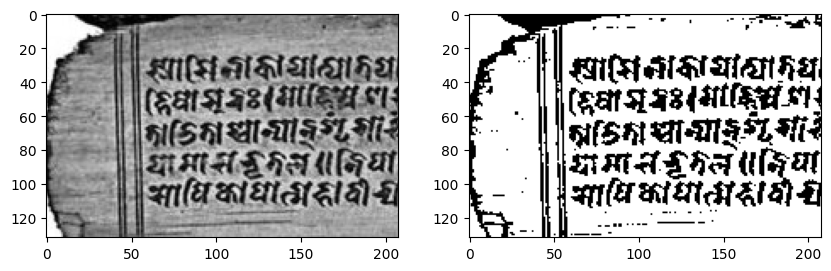

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(palm_leaf_1,'gray')
plt.subplot(1,2,2)
plt.imshow(binarized_image(palm_leaf_1),'gray')

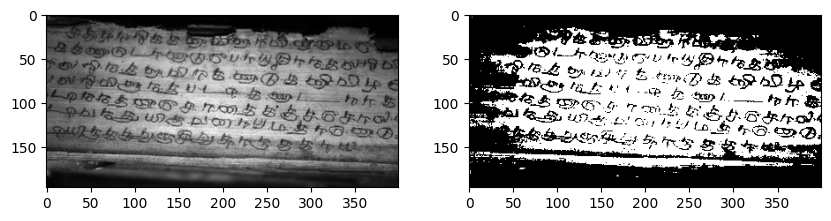

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(palm_leaf_2,'gray')
plt.subplot(1,2,2)
plt.imshow(binarized_image(palm_leaf_2),'gray')